In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [7]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [8]:
#train MLP model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [9]:
#test the model
y_pred=clf.predict(X_test)

In [10]:
#print confusion matrix and report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[91  9]
 [43 11]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       100
           1       0.55      0.20      0.30        54

    accuracy                           0.66       154
   macro avg       0.61      0.56      0.54       154
weighted avg       0.63      0.66      0.61       154



In [11]:
#train and evaluate RF model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[97  3]
 [35 19]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.84       100
           1       0.86      0.35      0.50        54

    accuracy                           0.75       154
   macro avg       0.80      0.66      0.67       154
weighted avg       0.78      0.75      0.72       154



In [12]:
#train and evaluate Kolmogorov Arnold Networks
dataset = {}
import torch
import numpy as np
dataset['train_input'] = torch.from_numpy(X_train)
dataset['test_input'] = torch.from_numpy(X_test)
dataset['train_label'] = torch.from_numpy(np.array(y_train))
dataset['test_label'] = torch.from_numpy(np.array(y_test))

In [13]:
from kan import KAN

In [14]:
model = KAN(width=[8,2], grid=10, k=5)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

train loss: 6.57e-01 | test loss: 6.58e-01 | reg: 8.11e+00 : 100%|██| 20/20 [00:28<00:00,  1.45s/it]


In [15]:
y_pred = np.argmax(model.forward(dataset['test_input']).detach().numpy(),axis = 1)
y_true = dataset['test_label'].detach().numpy()
from sklearn.metrics import classification_report, confusion_matrix
print("=========classification report========")
print(classification_report(y_true,y_pred))
print("=========confusion matrix========")
print(confusion_matrix(y_true,y_pred))

=========classification report========
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

=========confusion matrix========
[[87 13]
 [20 34]]


In [16]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9551333091563148
fixing (0,0,1) with abs, r2=0.9641621744465356
fixing (0,1,0) with sin, r2=0.84514638400795
fixing (0,1,1) with sin, r2=0.9926118000661235
fixing (0,2,0) with abs, r2=0.9999541650704664
fixing (0,2,1) with abs, r2=0.9999359769425268
fixing (0,3,0) with abs, r2=0.9995004774018242
fixing (0,3,1) with abs, r2=0.9996820826751575
fixing (0,4,0) with exp, r2=0.9998564027777375
fixing (0,4,1) with abs, r2=0.9999402116935726
fixing (0,5,0) with sin, r2=0.9955777230013726
fixing (0,5,1) with sin, r2=0.9980026326722226
fixing (0,6,0) with x^4, r2=0.9278939929642128
fixing (0,6,1) with tanh, r2=0.9940278091655911
fixing (0,7,0) with x^4, r2=0.7886583582571218
fixing (0,7,1) with abs, r2=0.9468990318290436


In [17]:
formula1, formula2 = model.symbolic_formula()[0]

In [18]:
formula1

1.5*(0.96 - x_7)**4 + 9.83*(1 - 0.02*x_8)**4 - 1.35*sin(6.42*x_1 - 3.92) - 0.42*sin(6.26*x_2 - 1.0) + 0.03*Abs(8.02*x_3 - 2.02) + 0.02*Abs(10.0*x_4 + 8.4) + 3.99951172

In [19]:
formula2

3.87*sin(6.29*x_2 - 0.65) - 21.44*sin(0.02*x_6 + 2.6) + 0.56*tanh(5.0*x_7 - 1.53) + 0.02*Abs(7.98*x_1 - 0.61) + 0.03*Abs(9.8*x_3 + 10.0) + 0.03*Abs(10.0*x_4 - 3.4) + 0.04*Abs(7.98*x_5 - 3.89) - 0.31*Abs(0.2*x_8 - 10.0) + 10.63

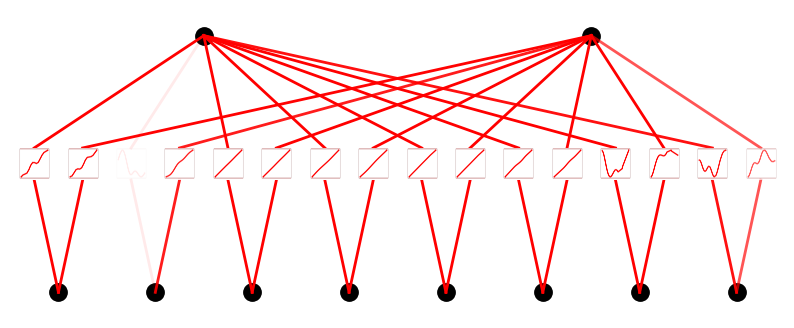

In [20]:
model.plot(beta=100, scale=1)